# Multiple Linear Regression
## Bike-sharing system

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 





## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [125]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [126]:
import numpy as np
import pandas as pd

In [127]:
bike_sharing_dataset = pd.read_csv("day.csv")

In [128]:
# Check the head of the dataset
bike_sharing_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [129]:
#check the shape
bike_sharing_dataset.shape

(730, 16)

In [130]:
#check dataframe for null count and respective datatype 
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [131]:
#check the Distribution of numeriacl data
bike_sharing_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


730 rows and 16 columns are present in the dataset

There are no null values in any of the column

## Step 2: Drop the unwanted columns 

Drop columns which are not useful for the analysis of the liner regression model


1. instant is just a row instance identifier.

2. dteday can be removed as we have some of date features like mnth and year 

3. casual and registered variables are not required at the time of prediction. We have the target variable cnt = casual + registered

In [132]:
drop_unwanted_cols_list = ['instant', 'dteday', 'casual', 'registered']
# Droping instant column as it is index column which has nothing to do with target
bike_sharing_dataset.drop(drop_unwanted_cols_list, axis = 1, inplace = True)
bike_sharing_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [133]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [134]:
bike_sharing_dataset.shape

(730, 12)

## Step 3: Visualising the Data

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables


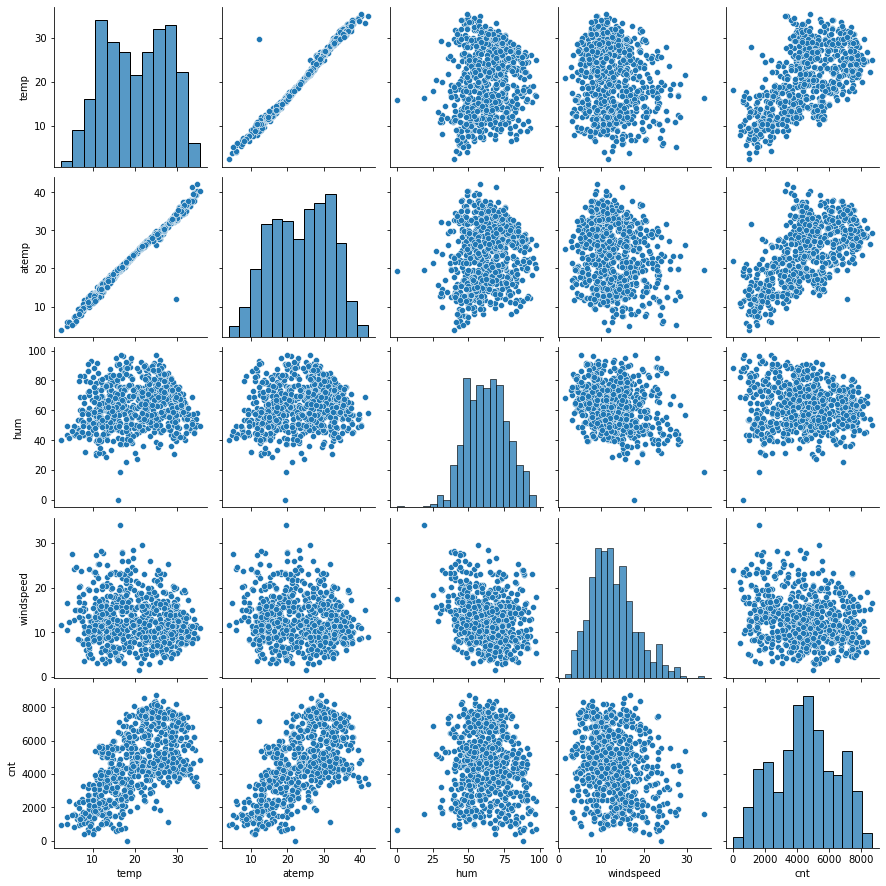

In [136]:
sns.pairplot(data = bike_sharing_dataset, vars = ['temp', 'atemp', 'hum','windspeed', 'cnt'])
plt.show()

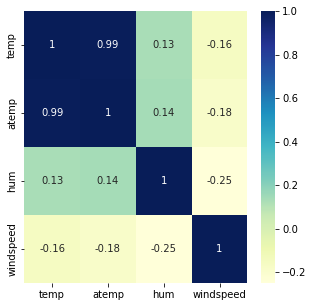

In [137]:
plt.figure(figsize = (5, 5))
sns.heatmap(bike_sharing_dataset[['temp','atemp','hum','windspeed']].corr(), cmap='YlGnBu', annot = True)
plt.show()

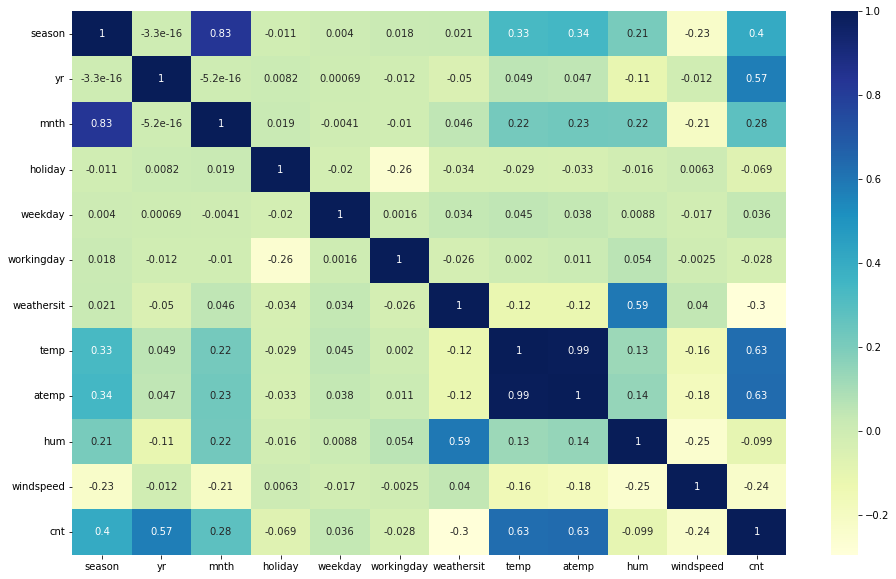

In [138]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_sharing_dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above, pairplot we can see that temp and atemp are highly co-related with each other

#### Visualising Categorical Variables


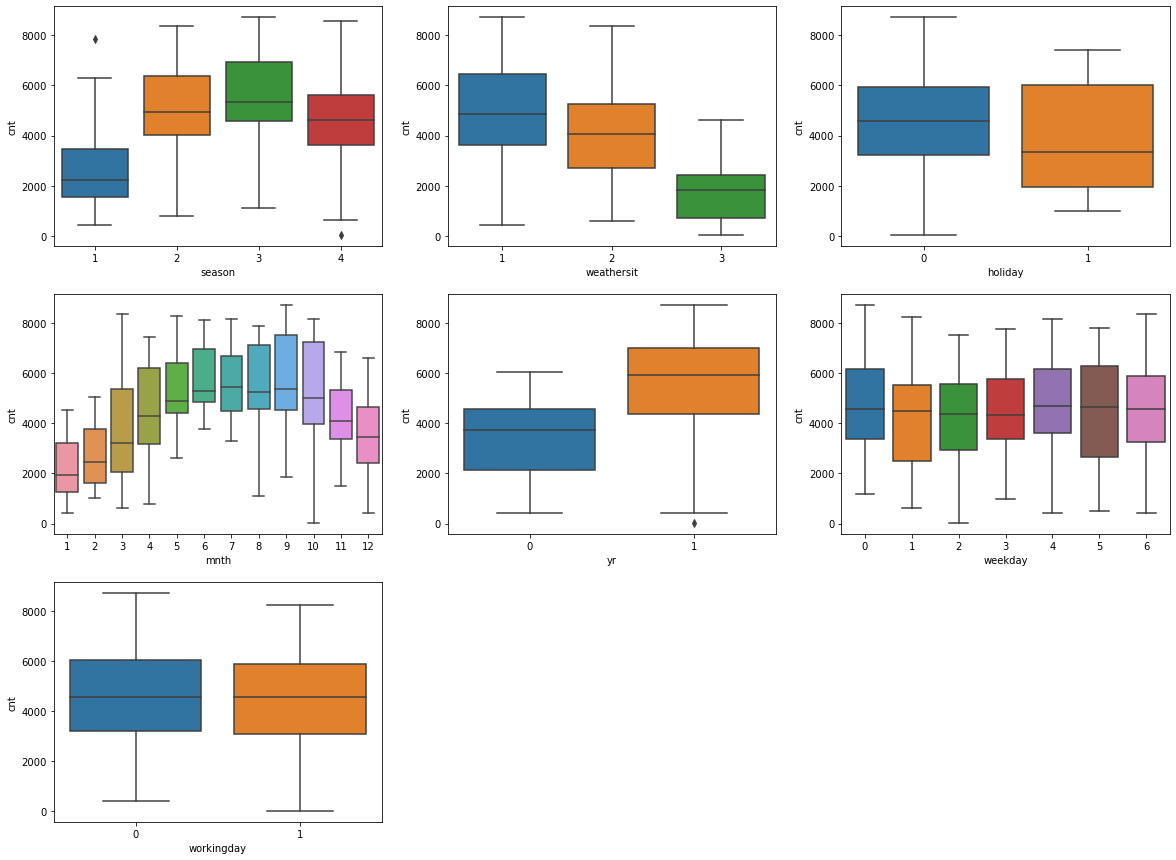

In [139]:
plt.figure(figsize=(20, 15))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_dataset)

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_dataset)

plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_dataset)

plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_dataset)

plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_dataset)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_dataset)

plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_dataset)
plt.show()

1. The demand for the bike is less in the month of spring as compared to other seasons
2. Bike demand is less where there is a holiday.
3. The median of the bike's demand is almost similar throughout all the weekdays.
4. Similarly, bike demand is somewhat following a similar pattern both during the working day and non-working day.
5. The demand for bikes has increased in the year 2019 as compared to 2018.
6. From month May to September bike demand is quite high. 
7. The bike demand is prettyty high when the weather is clear


#### Visualising the outliers for Numerial variables


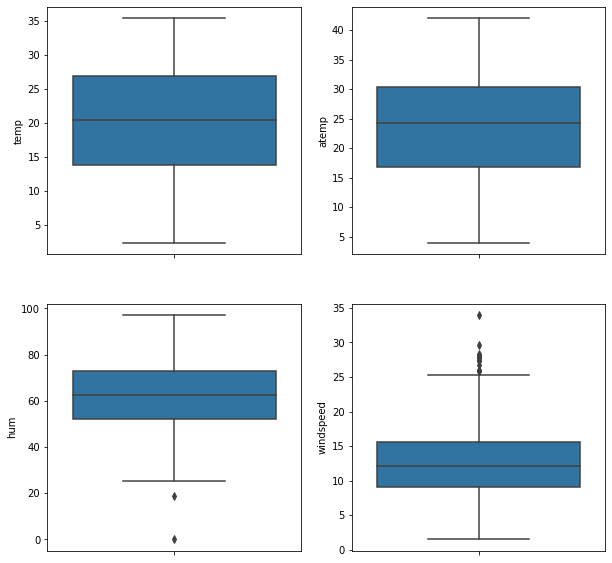

In [140]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(10,10))

index = 1
for column in numerical_cols:
    plt.subplot(2,2,index)
    sns.boxplot(y = column, data=bike_sharing_dataset)
    index+=1

From above image we can see that there are hardly any outliers so we can proceed further

## Step 4: Data Preparation

1. Manipulate the categorical variables
2. Dummy Variables - We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [141]:
# modify the season variable according to the given data dictionary
bike_sharing_dataset['season'] = bike_sharing_dataset['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# modify the weathersit variable according to the given data dictionary
bike_sharing_dataset['weathersit'] = bike_sharing_dataset['weathersit'].map({1:'good',2:'moderate',3:'bad',4:'severe'})

# modify the mnth variable according to the given data dictionary
bike_sharing_dataset['mnth'] = bike_sharing_dataset['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

# modify the weekday variable according to the given data dictionary
bike_sharing_dataset['weekday'] = bike_sharing_dataset['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 
                                                                       4: 'thu', 5: 'fri', 6: 'sat'})

bike_sharing_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [142]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [143]:
dummy_variables_list = ['season', 'weathersit', 'mnth', 'weekday']

dummy_variables_data = pd.get_dummies(bike_sharing_dataset[dummy_variables_list], drop_first = True)

dummy_variables_data.columns

Index(['season_spring', 'season_summer', 'season_winter', 'weathersit_good',
       'weathersit_moderate', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [144]:
## adding dummy variables to the dataset
bike_sharing_dataset = pd.concat([dummy_variables_data, bike_sharing_dataset], axis = 1)

In [145]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season_spring        730 non-null    uint8  
 1   season_summer        730 non-null    uint8  
 2   season_winter        730 non-null    uint8  
 3   weathersit_good      730 non-null    uint8  
 4   weathersit_moderate  730 non-null    uint8  
 5   mnth_aug             730 non-null    uint8  
 6   mnth_dec             730 non-null    uint8  
 7   mnth_feb             730 non-null    uint8  
 8   mnth_jan             730 non-null    uint8  
 9   mnth_jul             730 non-null    uint8  
 10  mnth_jun             730 non-null    uint8  
 11  mnth_mar             730 non-null    uint8  
 12  mnth_may             730 non-null    uint8  
 13  mnth_nov             730 non-null    uint8  
 14  mnth_oct             730 non-null    uint8  
 15  mnth_sept            730 non-null    uin

In [146]:
## dropping columns for which dummy variables were created
bike_sharing_dataset.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [147]:
bike_sharing_dataset.head()

,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,...,weekday_tue,weekday_wed,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [148]:
bike_sharing_dataset.shape

(730, 30)

##  Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [149]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_sharing_dataset, train_size = 0.7, random_state = 100)

## Rescaling the Features
Min-Max scaling

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
scaler = MinMaxScaler()

In [152]:
# Apply scaler() to all the columns except the 'dummy' variables
scale_num_vars = ['cnt','hum','windspeed','temp','atemp']

df_train[scale_num_vars] = scaler.fit_transform(df_train[scale_num_vars])

In [153]:
df_train.head()

,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,...,weekday_tue,weekday_wed,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [154]:
df_train.describe()

,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,...,weekday_tue,weekday_wed,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.625490,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,...,0.152941,0.135294,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.484471,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,...,0.360284,0.342373,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


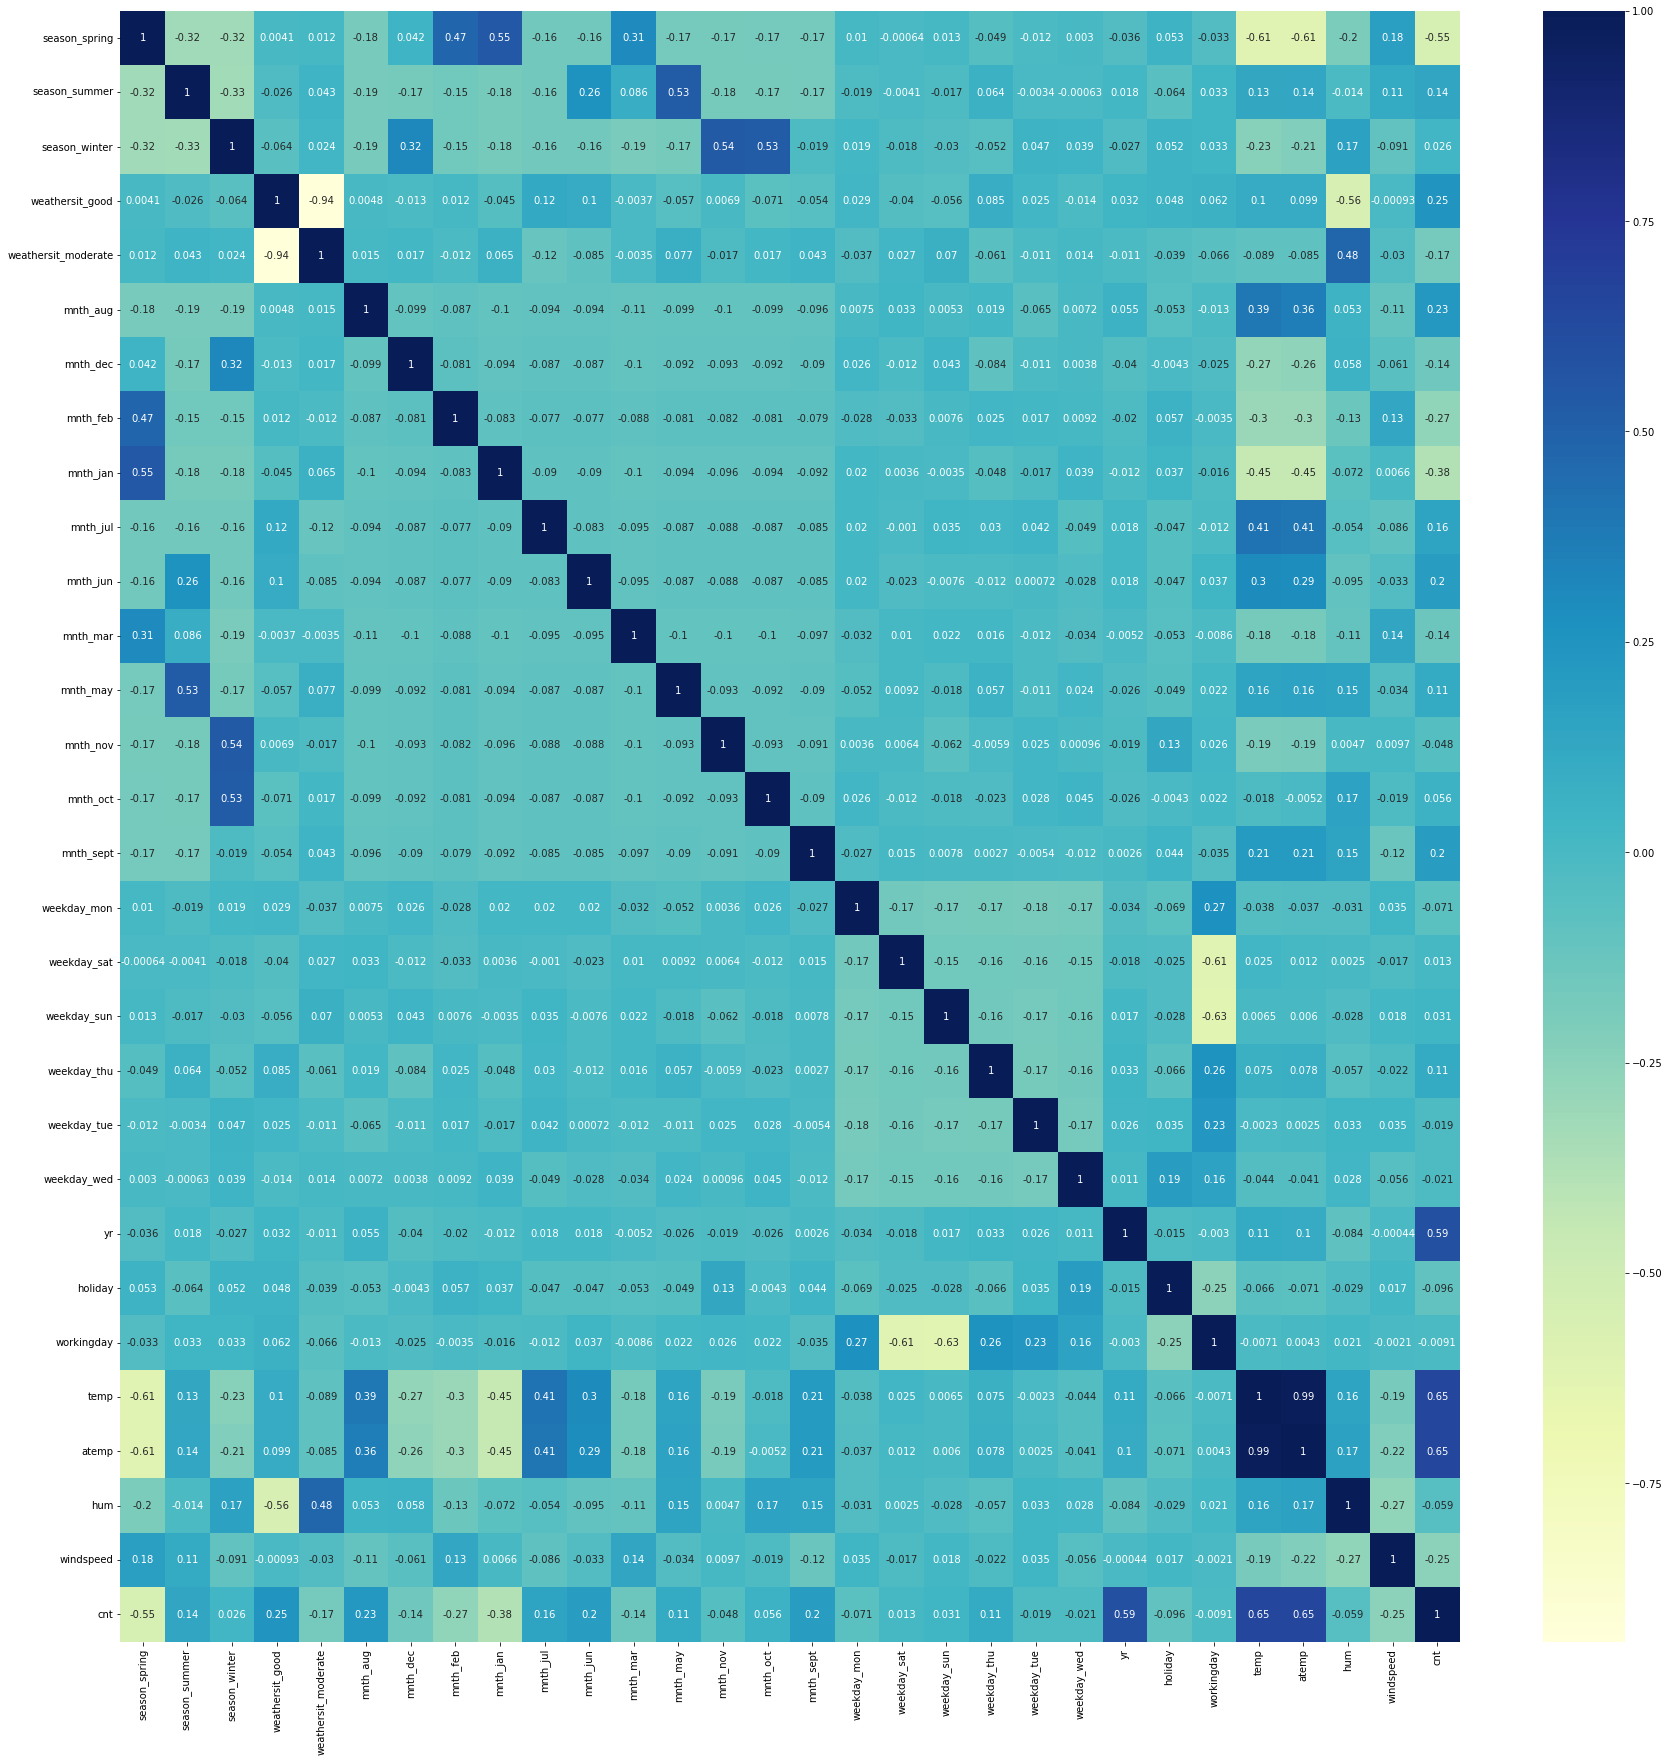

In [155]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [156]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6: Building a linear model
### Build a Model using RFE and Automated approach

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [158]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(lm)

LinearRegression()


In [159]:
#Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1)]

atemp is highly coorelated so its automatically removed from automated approach

### Manual elimination

In [160]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
#Function definition to build a lier regression model using statsmodel api 
def build_mlr_model(X):
    print(X.columns)
    print(X.shape)
    print()
    X_sm = sm.add_constant(X)
    lm = sm.OLS(y_train, X_sm).fit()
    print(lm.summary())
    return lm

In [162]:
#Function to calculate VIFs
def build_vif(X):
    df1 = X
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF', ascending=False))

In [163]:
#Print Columns selected by RFE.
X_train.columns[rfe.support_]

Index(['season_spring', 'season_summer', 'season_winter', 'weathersit_good',
       'weathersit_moderate', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [164]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday', 'atemp'],
      dtype='object')

In [165]:
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'weathersit_good',
       'weathersit_moderate', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [166]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [167]:
X_train_rfe.shape

(510, 15)

In [168]:
# X_train_rfe = sm.add_constant(X_train_rfe)
# lm = sm.OLS(y_train, X_train_rfe).fit()

### Model 1 - Start with all variables selected by RFE

In [169]:
#Selected columns for Model 1 - all columns selected by RFE
build_mlr_model(X_train_rfe)
build_vif(X_train_rfe)

Index(['season_spring', 'season_summer', 'season_winter', 'weathersit_good',
       'weathersit_moderate', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')
(510, 15)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          8.15e-189
Time:                        12:59:48   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobu

Looks like p-value for every independent variable is less than 0.05
Lets focus on VIF and remove the variables 1 by 1

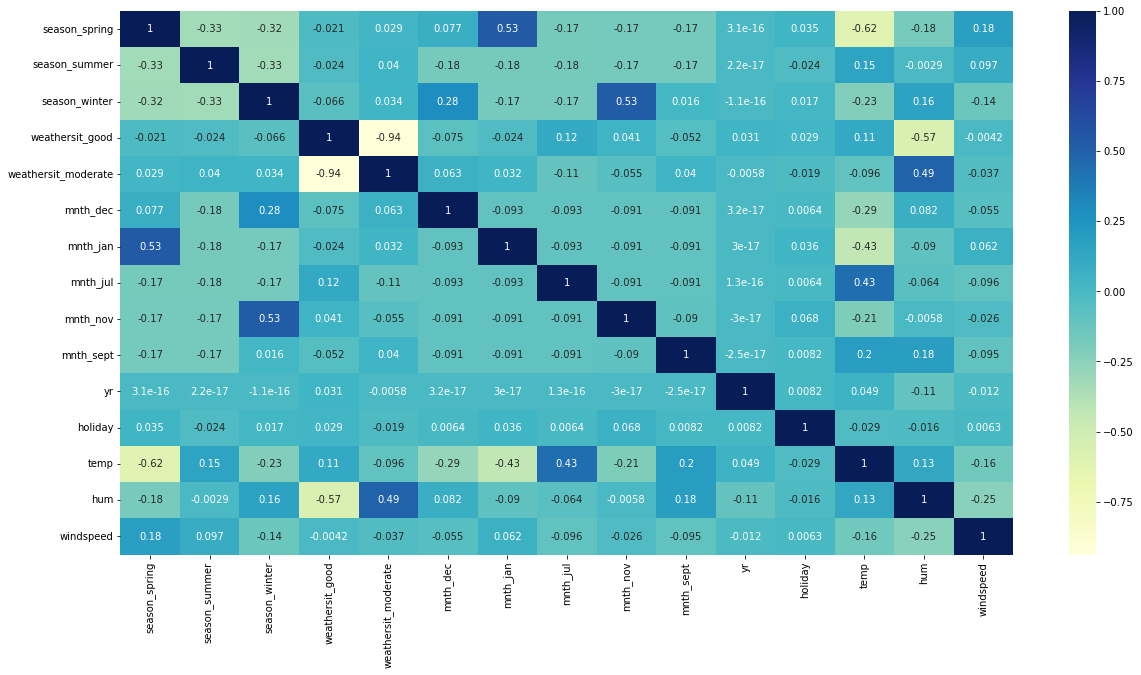

In [170]:
# Check correlation of features selected by RFE  
plt.figure(figsize = (20,10))
sns.heatmap(bike_sharing_dataset[col].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Model 2 - Dropping the variable hum where VIF 26.36, pretty large

In [171]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)
build_mlr_model(X_train_rfe)
build_vif(X_train_rfe)

Index(['season_spring', 'season_summer', 'season_winter', 'weathersit_good',
       'weathersit_moderate', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'yr', 'holiday', 'temp', 'windspeed'],
      dtype='object')
(510, 14)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          4.75e-186
Time:                        12:59:49   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust     

### Model 3 - Dropping the variable weathersit_good as it has high VIF 15.68

In [172]:
X_train_rfe = X_train_rfe.drop(["weathersit_good"], axis = 1)
build_mlr_model(X_train_rfe)
build_vif(X_train_rfe)

Index(['season_spring', 'season_summer', 'season_winter',
       'weathersit_moderate', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'yr', 'holiday', 'temp', 'windspeed'],
      dtype='object')
(510, 13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.75e-160
Time:                        12:59:49   Log-Likelihood:                 441.27
No. Observations:                 510   AIC:                            -854.5
Df Residuals:                     496   BIC:                            -795.3
Df Model:                          13                                         
Covariance Type:            nonrobust                        

### Model 4 - Dropping the variable mnth_nov as it has high p-value 0.249 > 0.05

In [173]:
X_train_rfe = X_train_rfe.drop(["mnth_nov"], axis = 1)
build_mlr_model(X_train_rfe)
build_vif(X_train_rfe)

Index(['season_spring', 'season_summer', 'season_winter',
       'weathersit_moderate', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'yr', 'holiday', 'temp', 'windspeed'],
      dtype='object')
(510, 12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.28e-161
Time:                        12:59:49   Log-Likelihood:                 440.73
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     497   BIC:                            -800.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                    

### Model 5 - Dropping the variable mnth_dec as it has a high p-value

In [174]:
X_train_rfe = X_train_rfe.drop(["mnth_dec"], axis = 1)
build_mlr_model(X_train_rfe)
build_vif(X_train_rfe)

Index(['season_spring', 'season_summer', 'season_winter',
       'weathersit_moderate', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'yr',
       'holiday', 'temp', 'windspeed'],
      dtype='object')
(510, 11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.65e-162
Time:                        12:59:49   Log-Likelihood:                 440.27
No. Observations:                 510   AIC:                            -856.5
Df Residuals:                     498   BIC:                            -805.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
      

### Model 6 - Dropping the variable mnth_jan as it has p-value > 0.05

In [175]:
X_train_rfe = X_train_rfe.drop(["mnth_jan"], axis = 1)
lm = build_mlr_model(X_train_rfe)
build_vif(X_train_rfe)

Index(['season_spring', 'season_summer', 'season_winter',
       'weathersit_moderate', 'mnth_jul', 'mnth_sept', 'yr', 'holiday', 'temp',
       'windspeed'],
      dtype='object')
(510, 10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          7.37e-163
Time:                        12:59:49   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  

In [176]:
X_train_rfe.shape

(510, 10)

## Step 7: Residual Analysis of the training data

Lets check the normal distribution of the error terms.

In [177]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

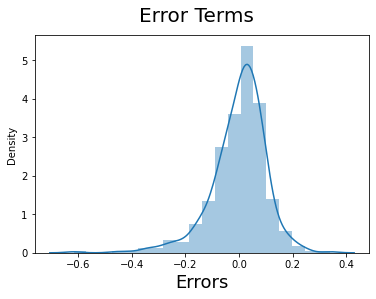

In [178]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                        

From the above histogram, we can see that the Residuals are normally distributed. Hence, our assumption for Linear Regression is valid.

## Step 8: Making Predictions

#### Applying the scaling on the test sets

In [179]:
scale_num_vars = ['cnt','hum','windspeed','temp','atemp']
df_test[scale_num_vars] = scaler.transform(df_test[scale_num_vars])

In [180]:
df_test.describe()

,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,...,weekday_tue,weekday_wed,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.654545,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,...,0.122727,0.159091,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.476601,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,...,0.328872,0.366595,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [181]:
y_test = df_test.pop('cnt')
X_test = df_test

In [182]:
# Now let's use our model to make predictions.
print(X_train_rfe.columns)
print(X_train_rfe.shape)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]
print(X_test_rfe.shape)
# Adding a constant variable 
# X_test_rfe = sm.add_constant(X_test_rfe)
print(X_test_rfe.shape)

Index(['season_spring', 'season_summer', 'season_winter',
       'weathersit_moderate', 'mnth_jul', 'mnth_sept', 'yr', 'holiday', 'temp',
       'windspeed'],
      dtype='object')
(510, 10)
(220, 10)
(220, 10)


In [183]:
# Making predictions
y_test_pred = lm.predict(X_test_rfe)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_test_pred')

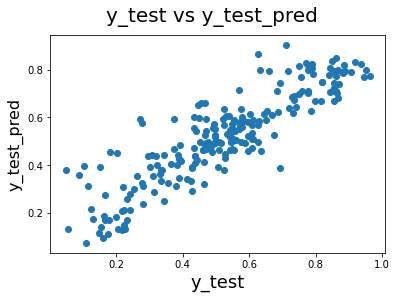

In [184]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)                        




$ cnt = -0.0597  \times  season_spring +  0.0483  \times  season_summer + 0.0733 \times season_winter + -0.0682  \times weathersit_moderate + -0.0550 \times mnth_jul + 0.0671 \times mnth_sept + 0.2390 \times yr + -0.0845 \times holiday + 0.5039 \times temp + -0.1773 \times windspeed $


## R-squared score

In [185]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7777501913564924